In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pyflux as pf
import matplotlib.pyplot as plt

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('sales.csv', parse_dates=['ds'], date_parser=dateparse, index_col='ds')
# df = pd.read_csv('sales.csv', parse_dates=['ds'], date_parser=dateparse)

print(df.head())

plt.figure(figsize=(15, 5))
plt.ylabel("Returns")
plt.plot(df)
plt.show()

pf.acf_plot(df.values.T[0])
pf.acf_plot(np.square(df.values.T[0]))

                 y
ds                
2009-10-01  338630
2009-11-01  339386
2009-12-01  400264
2010-01-01  314640
2010-02-01  311022


<Figure size 1500x500 with 1 Axes>

<Figure size 1500x500 with 1 Axes>

<Figure size 1500x500 with 1 Axes>

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Constant                  Normal          mu0: 0, sigma0: 3         Normal     None      
1        AR(1)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
2        AR(2)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
3        AR(3)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
4        MA(1)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
5        MA(2)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
6        Normal Scale              Flat            n/a (non-informative)     Normal     exp       
Normal ARIMA(3,1,2)                                                                                       
==

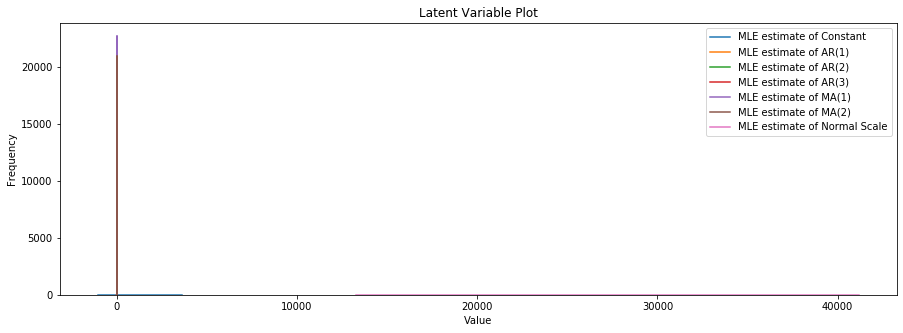

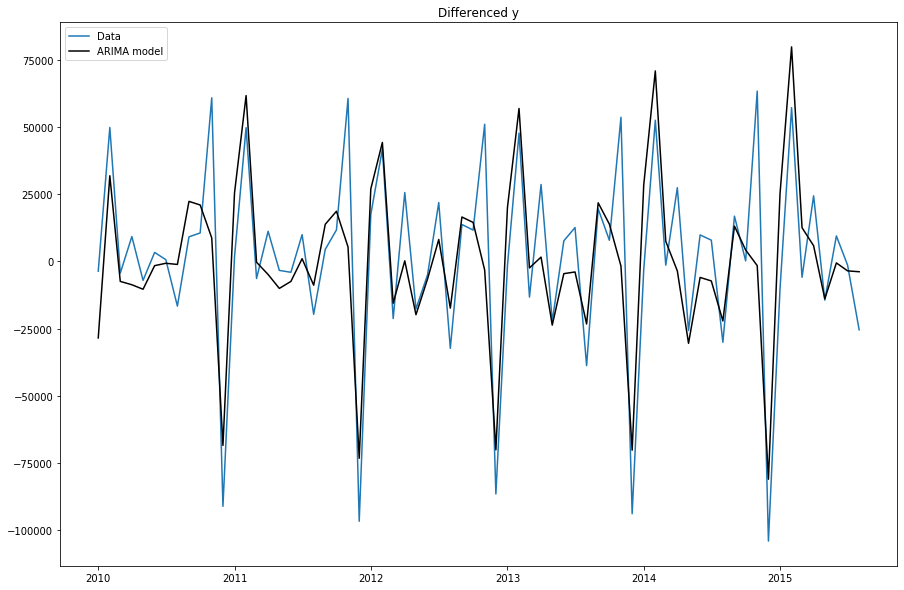

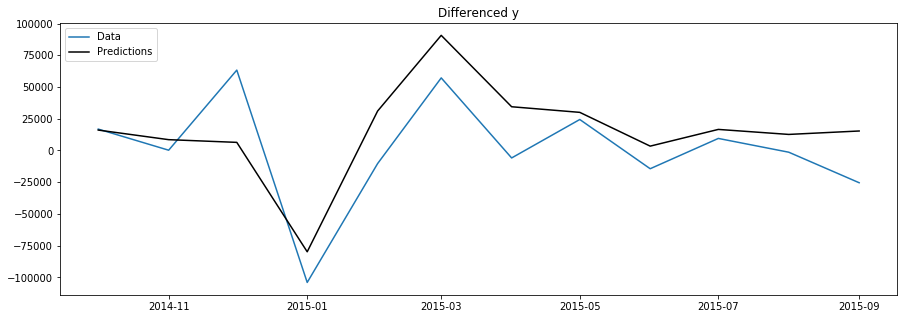

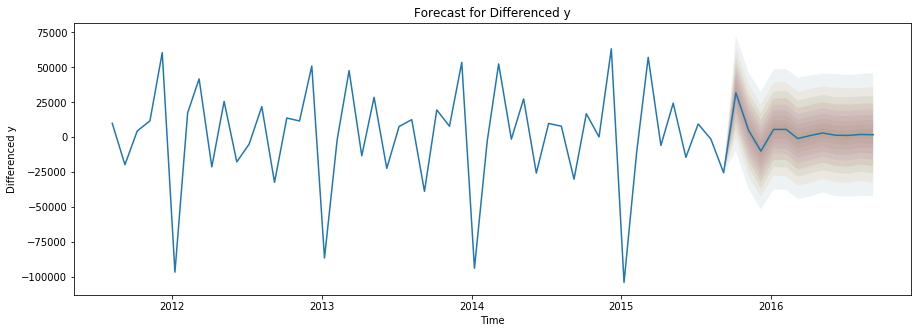

In [6]:
my_model = pf.ARIMA(data=df, ar=3, ma=2, integ=1, target='y')
print(my_model.latent_variables)

result = my_model.fit()
result.summary()

my_model.plot_z(figsize=(15,5))
my_model.plot_fit(figsize=(15,10))
my_model.plot_predict_is(h=12, figsize=(15,5))
my_model.plot_predict(h=12,past_values=50,figsize=(15,5))